## bioinformatics coursework part 3

In [2]:
import pronto
from prettytable import PrettyTable
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np


In [3]:
# Task 1
mondo=pronto.Ontology("mondo.obo")

for mondo_term in mondo:
    try:
        current_term = mondo.get_term(mondo_term)
        if current_term.name == "nervous system disorder":
            print(f"{current_term.name} ID: {current_term.id}")
    except:
        pass
    
# nervous system disorder ID: MONDO:0005071


nervous system disorder ID: MONDO:0005071


In [4]:
# Task 2
subclasses = mondo['MONDO:0005071'].subclasses()
sc_length = 0
for sc in subclasses:
    print(f"ID={sc.id}, name={sc.name}")
    sc_length += 1
print(f"There are {sc_length-1} subclasses in total (excl. nervous system disorder)")


ID=MONDO:0005071, name=nervous system disorder
ID=MONDO:0002320, name=congenital nervous system disorder
ID=MONDO:0002602, name=central nervous system disorder
ID=MONDO:0002977, name=autoimmune disorder of the nervous system
ID=MONDO:0003569, name=cranial nerve neuropathy
ID=MONDO:0003620, name=peripheral nervous system disorder
ID=MONDO:0004466, name=neuronitis
ID=MONDO:0004618, name=diplegia of upper limb
ID=MONDO:0005283, name=retinal disorder
ID=MONDO:0005287, name=developmental disability
ID=MONDO:0005391, name=restless legs syndrome
ID=MONDO:0005395, name=movement disorder
ID=MONDO:0005404, name=myalgic encephalomeyelitis/chronic fatigue syndrome
ID=MONDO:0005527, name=toxic encephalopathy
ID=MONDO:0005663, name=Barre-Lieou syndrome
ID=MONDO:0005773, name=Gerstmann syndrome
ID=MONDO:0006731, name=drug-induced akathisia
ID=MONDO:0006732, name=drug-induced dyskinesia
ID=MONDO:0007113, name=Angelman syndrome
ID=MONDO:0008108, name=oculocerebrocutaneous syndrome
ID=MONDO:0008491, nam

In [5]:
# task 3
iter(subclasses)
next(subclasses)

mondo_ids = []
mondo_names = []

for _ in range(10):
    t = next(subclasses)
    mondo_ids.append(t.id)
    mondo_names.append(t.name)
    
table = PrettyTable()
table.add_column("MONDO_ID", mondo_ids)
table.add_column("MONDO_NAME", mondo_names)
print(table, "\n\n")


+---------------+-------------------------------------------+
|    MONDO_ID   |                 MONDO_NAME                |
+---------------+-------------------------------------------+
| MONDO:0002320 |     congenital nervous system disorder    |
| MONDO:0002602 |      central nervous system disorder      |
| MONDO:0002977 | autoimmune disorder of the nervous system |
| MONDO:0003569 |          cranial nerve neuropathy         |
| MONDO:0003620 |     peripheral nervous system disorder    |
| MONDO:0004466 |                 neuronitis                |
| MONDO:0004618 |           diplegia of upper limb          |
| MONDO:0005283 |              retinal disorder             |
| MONDO:0005287 |          developmental disability         |
| MONDO:0005391 |           restless legs syndrome          |
+---------------+-------------------------------------------+ 




C:\Users\andre\AppData\Local\Temp\ipykernel_9848\204427781.py:3: DeprecationWarning: `Term.subclasses()` and `Term.superclasses()` will not return iterators in next major version, but iterables. Update your code to use `iter(...)` if needed.
  next(subclasses)


In [6]:
# task 4
gencc_df = pd.read_csv("gencc-submissions.tsv", sep="\t")

# Getting a list of all mondo IDs:
nerv_sys_disorder_ids = list(map(lambda term: term.id, list(subclasses)[1:]))
#print(nerv_sys_disorder_ids)

# select rows from the gencc_df that contain nervous_system_disorder_ids:
nsd_gcc_df = gencc_df[np.isin(gencc_df['disease_curie'], nerv_sys_disorder_ids)]
print(len(nsd_gcc_df))

# Counting the number of genes associated with each disease:
NSD_GCC_grouped_top10 = nsd_gcc_df.groupby(['disease_curie']).nunique().sort_values(by=['gene_curie']).filter(['gene_curie']).tail(10)

# presenting as a table: ID, name, gene count:
NSD_GCC_grouped_top10
# think finding a programmatic way to do this is more effort than it's worth, completing by hand for the most part
table = PrettyTable()

col1 = ['MONDO:0019502', 'MONDO:0019587', 'MONDO:0000508', 'MONDO:0007661', 'MONDO:0019588', 'MONDO:0005090', 'MONDO:0019497', 'MONDO:0019200', 'MONDO:0009723', 'MONDO:0100038']
table.add_column("MONDO_ID", col1)

col2 = []
for mondo_term in mondo:
    try:
        current_term = mondo.get_term(mondo_term)
        if current_term.id in col1:
            col2.append(current_term.name)
    except:
        pass
table.add_column("Disease Name", col2)

col3 = [35,55,74,78,87,89,93,104,127,159]
table.add_column("Gene Count", col3)

print(table, '\n\n')


6949
+---------------+-----------------------------------------------------------+------------+
|    MONDO_ID   |                        Disease Name                       | Gene Count |
+---------------+-----------------------------------------------------------+------------+
| MONDO:0019502 |             syndromic intellectual disability             |     35     |
| MONDO:0019587 |                       schizophrenia                       |     55     |
| MONDO:0000508 |                     Tourette syndrome                     |     74     |
| MONDO:0007661 |                       Leigh syndrome                      |     78     |
| MONDO:0019588 |             nonsyndromic genetic hearing loss             |     87     |
| MONDO:0005090 | autosomal recessive non-syndromic intellectual disability |     89     |
| MONDO:0019497 |        autosomal dominant nonsyndromic hearing loss       |     93     |
| MONDO:0019200 |             hearing loss, autosomal recessive             |    104 

In [7]:
# task 5
nsd_gcc_df.groupby(['gene_curie']).count().sort_values(by=['uuid']).tail(10)

# Gene ,Number of NSD_GenCC entries
table = PrettyTable()
col1 = ['HGNC:9086', 'HGNC:801', 'HGNC:7606', 'HGNC:12403', 'HGNC:18060', 'HGNC:2213', 'HGNC:19139', 'HGNC:10585', 'HGNC:6990', 'HGNC:10591']
table.add_column("Gene", col1)
col2 = [14,14,14,15,15,15,15,15,16,17]
table.add_column("Number of NSD GenCC Entries", col2)
print(table, '\n\n')


+------------+-----------------------------+
|    Gene    | Number of NSD GenCC Entries |
+------------+-----------------------------+
| HGNC:9086  |              14             |
|  HGNC:801  |              14             |
| HGNC:7606  |              14             |
| HGNC:12403 |              15             |
| HGNC:18060 |              15             |
| HGNC:2213  |              15             |
| HGNC:19139 |              15             |
| HGNC:10585 |              15             |
| HGNC:6990  |              16             |
| HGNC:10591 |              17             |
+------------+-----------------------------+ 




In [8]:
# task 6
print(f"There are {len(nsd_gcc_df['gene_curie'].unique())} unique gene curies in the NSD GenCC df")

There are 2208 unique gene curies in the NSD GenCC df


In [42]:
# ADDITIONAL ANALYSIS...
# OPTIONS:

# - look at the disribution of diseases across the MONDO ontology, are particular disease groupings
# more densely represented?

from itertools import chain

mondo=pronto.Ontology("mondo.obo")
# working from leaf up... DOES NOT WORK!
# leafs = list(filter(lambda x: x is not None, [term if term.is_leaf() and not term.obsolete else None for term in mondo.terms()]))
# sup = iter(leafs[0].superclasses(distance=1, with_self=False))
# parents = [next(iter(leaf.superclasses(distance=1, with_self=False))) for leaf in leafs]

# working from root down...
root = mondo.get_term("MONDO:0000001") # disease
subclasses_l1 = list(root.subclasses(distance=1, with_self=False))
subclasses_l2 = list(set(chain(*[list(subclasses_l1[i].subclasses(distance=1, with_self=False)) for i in range(len(subclasses_l1))])))
#subclasses_l3 = list(set(chain(*[list(subclasses_l2[i].subclasses(distance=1, with_self=False)) for i in range(len(subclasses_l2))])))

# now getting the number of subclasses for each of these terms so we can see the most popular
subclass_size = []
for sc in subclasses_l2:
    subclass_size.append((sc, len(list(sc.subclasses())) - 1))

sorted_disease_groups = list(sorted(subclass_size, key=lambda x: x[1], reverse=True))

table = PrettyTable()
col1 = [x[0].name for x in sorted_disease_groups[:10]]
table.add_column("Disease Group", col1)
col2 = [x[1] for x in sorted_disease_groups[:10]]
table.add_column("Number of MONDO subclasses", col2)
print(table, '\n\n')

+------------------------------------------+----------------------------+
|              Disease Group               | Number of MONDO subclasses |
+------------------------------------------+----------------------------+
|            hereditary disease            |           10622            |
|         nervous system disorder          |            5587            |
|          cancer or benign tumor          |            4573            |
| disorder of development or morphogenesis |            4209            |
|     musculoskeletal system disorder      |            3220            |
|            syndromic disease             |            2987            |
|            metabolic disease             |            2313            |
|        disorder of visual system         |            1931            |
|        disorder of orbital region        |            1902            |
|      integumentary system disorder       |            1731            |
+-------------------------------------

C:\Users\andre\AppData\Local\Temp\ipykernel_9848\481296092.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=sorted_disease_groups_xs, y=sorted_disease_groups_ys, palette=sns.color_palette("BuGn_r", n_colors=14), ax=ax)
C:\Users\andre\AppData\Local\Temp\ipykernel_9848\481296092.py:9: UserWarning: The palette list has more values (14) than needed (10), which may not be intended.
  g = sns.barplot(x=sorted_disease_groups_xs, y=sorted_disease_groups_ys, palette=sns.color_palette("BuGn_r", n_colors=14), ax=ax)
C:\Users\andre\AppData\Local\Temp\ipykernel_9848\481296092.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


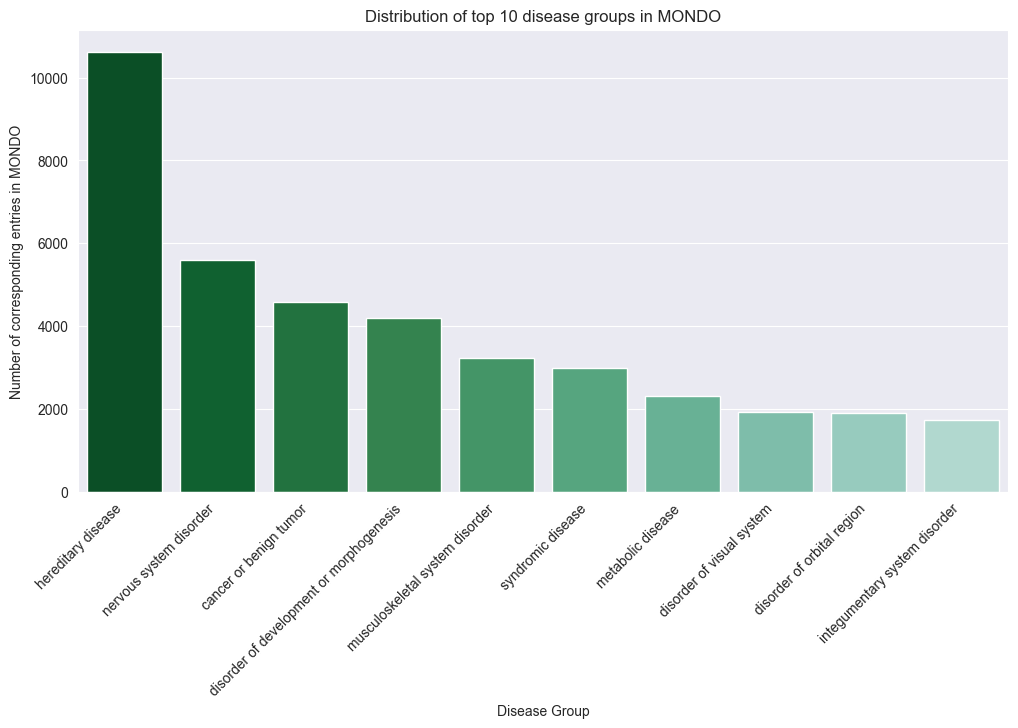

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_disease_groups_xs = [x[0].name for x in sorted_disease_groups[:10]]
sorted_disease_groups_ys = [x[1] for x in sorted_disease_groups[:10]]

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid")
g = sns.barplot(x=sorted_disease_groups_xs, y=sorted_disease_groups_ys, palette=sns.color_palette("BuGn_r", n_colors=14), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel("Disease Group")
ax.set_ylabel("Number of corresponding entries in MONDO")
ax.set_title("Distribution of top 10 disease groups in MONDO")
plt.show()